### Import dependencies and load the data file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as st


In [2]:
trips_file = "Trips_by_Distance.csv"
trips_distance_df = pd.read_csv(trips_file)
trips_distance_df.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,County,1/1/2019,34,NJ,34001.0,Atlantic County,"65,412","199,206","843,588","237,921","212,263","92,618","136,909","100,079","35,613","21,178","5,311",626,"1,070"
1,County,1/1/2019,34,NJ,34003.0,Bergen County,"237,866","695,963","2,722,275","812,551","703,573","319,765","398,958","325,758","90,433","38,672","17,805","4,522","10,238"
2,County,1/1/2019,34,NJ,34005.0,Burlington County,"100,791","343,232","1,315,760","350,422","316,098","150,400","197,259","201,325","58,958","28,598","8,528","1,939","2,233"
3,County,1/1/2019,34,NJ,34007.0,Camden County,"130,209","375,319","1,488,595","441,080","373,336","176,319","215,886","188,972","53,797","26,883","9,266","1,157","1,899"
4,County,1/1/2019,34,NJ,34009.0,Cape May County,"24,167","68,110","273,062","75,839","64,783","33,539","45,259","30,687","13,195","6,297","2,334",326,803


#### Example code for datetime 

In [3]:
# Sample setting up a test dataframe to setup datetime
test_df = pd.DataFrame({'date':['1/15/2020','2/25/2020','5/23/2020'], 'value':[2,6,8]})
test_df

,date,value
0,1/15/2020,2
1,2/25/2020,6
2,5/23/2020,8


In [4]:
# Example of how to use the datetime method to strip the date
test_df['datetime'] = pd.to_datetime(test_df['date'],format='%m/%d/%Y')

In [5]:
# Example of extracting the date into segments of day, month, year that can be used for filering, plotting
test_df['day'] = test_df['datetime'].map(lambda x: x.day)
test_df['month'] = test_df['datetime'].map(lambda x: x.month)
test_df['year'] = test_df['datetime'].map(lambda x: x.year)

In [6]:
#Demonstrating how to pullout this item "datetime" to plot, will use "datetime"to plot and graph
test_df.loc[test_df['year']==2020,:]

,date,value,datetime,day,month,year
0,1/15/2020,2,2020-01-15,15,1,2020
1,2/25/2020,6,2020-02-25,25,2,2020
2,5/23/2020,8,2020-05-23,23,5,2020


### Data cleanup

#### Convert strings to integers so that column values and be calcuated

In [7]:
#trips_distance_df.columns

colstoclean = [ 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
 'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500']
for col in colstoclean:
    print(col)
    trips_distance_df[col] = trips_distance_df[col].str.replace(",","").astype(int)

Population Staying at Home
Population Not Staying at Home
Number of Trips
Number of Trips <1
Number of Trips 1-3
Number of Trips 3-5
Number of Trips 5-10
Number of Trips 10-25
Number of Trips 25-50
Number of Trips 50-100
Number of Trips 100-250
Number of Trips 250-500
Number of Trips >=500


In [8]:
# Confirming that numerics are now integers and not strings
trips_distance_df

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,County,1/1/2019,34,NJ,34001.0,Atlantic County,65412,199206,843588,237921,212263,92618,136909,100079,35613,21178,5311,626,1070
1,County,1/1/2019,34,NJ,34003.0,Bergen County,237866,695963,2722275,812551,703573,319765,398958,325758,90433,38672,17805,4522,10238
2,County,1/1/2019,34,NJ,34005.0,Burlington County,100791,343232,1315760,350422,316098,150400,197259,201325,58958,28598,8528,1939,2233
3,County,1/1/2019,34,NJ,34007.0,Camden County,130209,375319,1488595,441080,373336,176319,215886,188972,53797,26883,9266,1157,1899
4,County,1/1/2019,34,NJ,34009.0,Cape May County,24167,68110,273062,75839,64783,33539,45259,30687,13195,6297,2334,326,803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16407,State,1/12/2021,34,NJ,NaN,NaN,2506718,6401802,26843158,7362466,6822160,3253194,4047021,3752525,1170676,320576,82660,16275,15605
16408,State,1/13/2021,34,NJ,NaN,NaN,2467930,6440590,27340842,7472647,6971641,3333853,4112024,3794990,1189414,337934,92339,18271,17729
16409,State,1/14/2021,34,NJ,NaN,NaN,2436114,6472406,27993214,7840653,7068405,3380179,4155667,3873261,1204053,338931,93109,21437,17519
16410,State,1/15/2021,34,NJ,NaN,NaN,2381567,6526953,30587598,8689113,7692018,3729100,4554750,4119801,1267105,374254,123295,22627,15535


#### Using datetime to format Date for use in visualizations

In [9]:
#dt = datetime.strptime("21/11/06 16:30", "%d/%m/%y %H:%M")
dt.datetime.strptime('1/1/2019', "%m/%d/%Y")

datetime.datetime(2019, 1, 1, 0, 0)

In [10]:
# Prior to data cleaning I am applying datetime to my dataframe and adding a new column called datetime
trips_distance_df['datetime'] = pd.to_datetime(trips_distance_df['Date'],format='%m/%d/%Y')

In [11]:
# Creating three new distinct columns for components of the date can be used for visualizations
trips_distance_df['day'] = trips_distance_df['datetime'].map(lambda x: x.day)
trips_distance_df['month'] = trips_distance_df['datetime'].map(lambda x: x.month)
trips_distance_df['year'] = trips_distance_df['datetime'].map(lambda x: x.year)

In [12]:
# Show me the data for the year "2020"
trips_distance_df.loc[trips_distance_df['year']==2020,:]

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,datetime,day,month,year
8027,County,1/1/2020,34,NJ,34001.0,Atlantic County,69389,196040,788240,178537,...,112040,35093,17644,4881,945,385,2020-01-01,1,1,2020
8028,County,1/1/2020,34,NJ,34003.0,Bergen County,255719,680973,2780919,777832,...,362126,88851,35854,21219,4007,3131,2020-01-01,1,1,2020
8029,County,1/1/2020,34,NJ,34005.0,Burlington County,116282,329102,1351837,343521,...,219600,54553,27510,8062,1689,935,2020-01-01,1,1,2020
8030,County,1/1/2020,34,NJ,34007.0,Camden County,140902,366176,1493737,395085,...,200196,46401,23770,7993,1081,877,2020-01-01,1,1,2020
8031,County,1/1/2020,34,NJ,34009.0,Cape May County,26719,65841,293162,83879,...,32358,13491,4744,1769,220,219,2020-01-01,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,State,12/27/2020,34,NJ,NaN,NaN,3004890,5903630,23602821,6495823,...,3130719,1008253,429150,184123,39053,15309,2020-12-27,27,12,2020
16120,State,12/28/2020,34,NJ,NaN,NaN,2729615,6178905,26760831,7169027,...,3854057,1240042,413399,145282,27293,13786,2020-12-28,28,12,2020
16121,State,12/29/2020,34,NJ,NaN,NaN,2689136,6219384,27239854,7085739,...,4053308,1280961,433345,146426,27947,13678,2020-12-29,29,12,2020
16122,State,12/30/2020,34,NJ,NaN,NaN,2632796,6275724,28164573,7397750,...,4080451,1312191,454640,167252,28899,14719,2020-12-30,30,12,2020


#### The data has null values that need to be removed

In [13]:
trips_distance_df.count()

Level                             16412
Date                              16412
State FIPS                        16412
State Postal Code                 16412
County FIPS                       15666
County Name                       15666
Population Staying at Home        16412
Population Not Staying at Home    16412
Number of Trips                   16412
Number of Trips <1                16412
Number of Trips 1-3               16412
Number of Trips 3-5               16412
Number of Trips 5-10              16412
Number of Trips 10-25             16412
Number of Trips 25-50             16412
Number of Trips 50-100            16412
Number of Trips 100-250           16412
Number of Trips 250-500           16412
Number of Trips >=500             16412
datetime                          16412
day                               16412
month                             16412
year                              16412
dtype: int64

In [14]:
# Using dropna to remove empty data
nonulls_trips_distance_df = trips_distance_df.dropna(how='any')

In [15]:
# Confirming empty data is removed
nonulls_trips_distance_df.count()

Level                             15666
Date                              15666
State FIPS                        15666
State Postal Code                 15666
County FIPS                       15666
County Name                       15666
Population Staying at Home        15666
Population Not Staying at Home    15666
Number of Trips                   15666
Number of Trips <1                15666
Number of Trips 1-3               15666
Number of Trips 3-5               15666
Number of Trips 5-10              15666
Number of Trips 10-25             15666
Number of Trips 25-50             15666
Number of Trips 50-100            15666
Number of Trips 100-250           15666
Number of Trips 250-500           15666
Number of Trips >=500             15666
datetime                          15666
day                               15666
month                             15666
year                              15666
dtype: int64

#### Remove unneeded columns

In [16]:
del nonulls_trips_distance_df['State FIPS'], nonulls_trips_distance_df['County FIPS']
nonulls_trips_distance_df.head(2)

,Level,Date,State Postal Code,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,datetime,day,month,year
0,County,1/1/2019,NJ,Atlantic County,65412,199206,843588,237921,212263,92618,...,100079,35613,21178,5311,626,1070,2019-01-01,1,1,2019
1,County,1/1/2019,NJ,Bergen County,237866,695963,2722275,812551,703573,319765,...,325758,90433,38672,17805,4522,10238,2019-01-01,1,1,2019


In [17]:
# Testing that the dataframe is ready and can be used with specific criteria passed to it
nonulls_trips_distance_df.loc[nonulls_trips_distance_df['year']==2020,:]

,Level,Date,State Postal Code,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,datetime,day,month,year
8027,County,1/1/2020,NJ,Atlantic County,69389,196040,788240,178537,193357,94786,...,112040,35093,17644,4881,945,385,2020-01-01,1,1,2020
8028,County,1/1/2020,NJ,Bergen County,255719,680973,2780919,777832,720160,326369,...,362126,88851,35854,21219,4007,3131,2020-01-01,1,1,2020
8029,County,1/1/2020,NJ,Burlington County,116282,329102,1351837,343521,337975,151234,...,219600,54553,27510,8062,1689,935,2020-01-01,1,1,2020
8030,County,1/1/2020,NJ,Camden County,140902,366176,1493737,395085,397688,187348,...,200196,46401,23770,7993,1081,877,2020-01-01,1,1,2020
8031,County,1/1/2020,NJ,Cape May County,26719,65841,293162,83879,69113,37747,...,32358,13491,4744,1769,220,219,2020-01-01,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16072,County,12/31/2020,NJ,Salem County,14821,47786,229221,55426,45018,27603,...,46314,13595,2713,1174,139,74,2020-12-31,31,12,2020
16073,County,12/31/2020,NJ,Somerset County,97805,233359,953661,220410,237083,129624,...,140327,48887,12378,4646,236,671,2020-12-31,31,12,2020
16074,County,12/31/2020,NJ,Sussex County,37184,103615,438467,96912,97261,51604,...,75169,33281,8354,2046,163,152,2020-12-31,31,12,2020
16075,County,12/31/2020,NJ,Union County,172473,385594,1697218,514973,480649,195926,...,203744,60244,20226,10609,2113,1201,2020-12-31,31,12,2020


## Create lists for the years

In [18]:
# Create a list for 2019
county_trips_2019 = nonulls_trips_distance_df.loc[nonulls_trips_distance_df['year']==2019,:]

# Display the 2019 dataframe
county_trips_2019.head(2)

,Level,Date,State Postal Code,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,datetime,day,month,year
0,County,1/1/2019,NJ,Atlantic County,65412,199206,843588,237921,212263,92618,...,100079,35613,21178,5311,626,1070,2019-01-01,1,1,2019
1,County,1/1/2019,NJ,Bergen County,237866,695963,2722275,812551,703573,319765,...,325758,90433,38672,17805,4522,10238,2019-01-01,1,1,2019


In [19]:
# I am now getting the actual sum of the values inside the columns!!!!!
county_trips_2019['Population Staying at Home'].sum()

665898705

In [20]:
#summary_2019 = 

#x_axis = np.arange(len('Number'))

In [21]:
# Create a list for 2020
county_trips_2020 = nonulls_trips_distance_df.loc[nonulls_trips_distance_df['year']==2020,:]

# Display the 2020 dataframe 
county_trips_2020.head(2)

,Level,Date,State Postal Code,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,datetime,day,month,year
8027,County,1/1/2020,NJ,Atlantic County,69389,196040,788240,178537,193357,94786,...,112040,35093,17644,4881,945,385,2020-01-01,1,1,2020
8028,County,1/1/2020,NJ,Bergen County,255719,680973,2780919,777832,720160,326369,...,362126,88851,35854,21219,4007,3131,2020-01-01,1,1,2020


In [22]:
# Create a list for 2021
county_trips_2021 = nonulls_trips_distance_df.loc[nonulls_trips_distance_df['year']==2021,:]

# Display the 2021 dataframe 
county_trips_2021.head(2)

,Level,Date,State Postal Code,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,datetime,day,month,year
16077,County,1/1/2021,NJ,Atlantic County,85238,180191,709090,183488,160684,81333,...,110383,29150,15026,3157,128,347,2021-01-01,1,1,2021
16078,County,1/1/2021,NJ,Bergen County,351178,585514,2111034,591953,566604,259502,...,257426,66109,32170,17168,4124,1558,2021-01-01,1,1,2021


In [38]:
# Combining the three lists
frames = [county_trips_2019, county_trips_2020, county_trips_2021]

combined_years = pd.concat(frames)
combined_years

,Level,Date,State Postal Code,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,datetime,day,month,year
0,County,1/1/2019,NJ,Atlantic County,65412,199206,843588,237921,212263,92618,...,100079,35613,21178,5311,626,1070,2019-01-01,1,1,2019
1,County,1/1/2019,NJ,Bergen County,237866,695963,2722275,812551,703573,319765,...,325758,90433,38672,17805,4522,10238,2019-01-01,1,1,2019
2,County,1/1/2019,NJ,Burlington County,100791,343232,1315760,350422,316098,150400,...,201325,58958,28598,8528,1939,2233,2019-01-01,1,1,2019
3,County,1/1/2019,NJ,Camden County,130209,375319,1488595,441080,373336,176319,...,188972,53797,26883,9266,1157,1899,2019-01-01,1,1,2019
4,County,1/1/2019,NJ,Cape May County,24167,68110,273062,75839,64783,33539,...,30687,13195,6297,2334,326,803,2019-01-01,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16400,County,1/16/2021,NJ,Salem County,14997,47610,254296,61181,46864,30682,...,52218,15951,3708,979,244,107,2021-01-16,16,1,2021
16401,County,1/16/2021,NJ,Somerset County,85784,245380,1195251,314062,275977,151579,...,176577,55641,15600,6417,379,821,2021-01-16,16,1,2021
16402,County,1/16/2021,NJ,Sussex County,34501,106298,550190,135344,122569,62473,...,91735,34716,7867,1890,201,130,2021-01-16,16,1,2021
16403,County,1/16/2021,NJ,Union County,159727,398340,2014171,640972,551051,243946,...,222017,64600,25170,8913,1673,1028,2021-01-16,16,1,2021


## Charts and Graphs

In [43]:
#combined_years['Population Staying at Home'].sum()
#combined_years.loc[combined_years['year']==2020,:]

<Figure size 5760x3600 with 0 Axes>

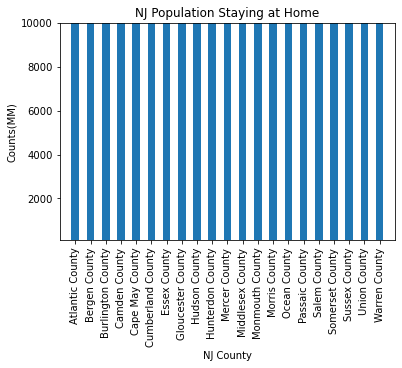

In [55]:
# Filter the dataframe to only chart the population staying at home in each county
staying_home = combined_years.groupby("County Name").sum()['Population Staying at Home']
staying_home_df = pd.DataFrame(staying_home)
staying_home_df

plt.figure(figsize=(80,50))
plt.xdata = staying_home_df.plot.bar(legend=False)
plt.xlim(-1, len(staying_home_df))
plt.ylim(100,10000)
plt.title ("NJ Population Staying at Home")
plt.xlabel ("NJ County")
plt.ylabel ("Counts")
#plt.legend('year')
plt.show()

In [ ]:
#grouped_nonulls = nonulls_trips_distance_df.groupby('County Name')['Number of Trips'].sum()
#grouped_nonulls_df = pd.DataFrame(grouped_nonulls)
#grouped_nonulls_df

In [ ]:
#grouped_nonulls.plot(kind='bar', figsize=(10,6), rot=0)
#plt.ylim(125, 250)
#plt.ylabel()


In [ ]:
#plt.figure(figsize=(80,60))
#plt.xdata = grouped_nonulls_df.plot.bar(legend=False)
#plt.xlim(-1, len(grouped_nonulls))
#plt.ylim(125, 250)
#plt.title("Total number of trips per Counties in NJ")
#plt.xlabel("County Name")
#plt.ylabel("Number of Trips")
#plt.legend(loc='uppper right')
#plt.show()

In [ ]:
#somerset_county = nonulls_trips_distance_df.loc[nonulls_trips_distance_df['County Name']=='Somerset County']
#somerset_county

In [ ]:
#somerset_county_2019 = somerset_county.loc[somerset_county['Date']=='2019']
#somerset_county_2019.head()

In [ ]:
#summary_somerset_county = somerset_county.groupby('Date')['Number of Trips'].sum()
#summary_somerset_county = somerset_county.groupby('Number of Trips').sum()
#grouped_summary_country = summary_somerset_county.groupby('Date')
#summary_somerset_county = pd.DataFrame(summary_somerset_county)
#summary_somerset_county
#print(summary_somerset_county)

In [ ]:
#summary_county_trips = nonulls_trips_distance_df.groupby('Date')['Number of Trips >=500'].count()
#summary_county_trips = pd.DataFrame(summary_county_trips)
#summary_county_trips

In [ ]:
# Set x axis and tick locations
#x_axis = np.arange(len(nonulls_trips_distance_df))
#tick_locations = [value+0.4 for value in x_axis]

In [ ]:
# Create a list indicating where to write x labels and set figure size to adjust for space
#plt.figure(figsize=(20,3))
#plt.bar(x_axis, nonulls_trips_distance_df["Number of Trips"], color='r', alpha=0.5, align="edge")
#plt.xticks(tick_locations, nonulls_trips_distance_df["County Name"], rotation="vertical")

In [ ]:
# Set x and y limits
#plt.xlim(-0.25, len(x_axis))
#plt.ylim(0, max(nonulls_trips_distance_df["Number of Trips"])+10)

In [ ]:
# Set a Title and labels
#plt.title("Total number of trips per Counties in NJ")
#plt.xlabel("County Name")
#plt.ylabel("Number of Trips")

In [ ]:
# Save our graph and show the grap
#plt.tight_layout()
#plt.savefig("../Images/avg_state_rain.png")
#plt.show()

In [ ]:
#grouped_by_date = trips_distance_df.groupby('Date')['County Name'].nunique()
#grouped_by_date = trips_distance_df.groupby('Date')['County Name']
#grouped_by_date = pd.Dataframe({"Date":'Date', "County Name":'County Name'}).sort_values
#grouped_by_date



#gender_counts = purchase_data.groupby('Gender')['SN'].nunique()
#gender_percentage = round(gender_counts / number_of_players * 100,2)

#gender_summary_df = pd.DataFrame({"Total Count": gender_counts, "Percentage of Players": gender_percentage}).sort_values(["Total Count"], ascending=False)
#gender_summary_df
